# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Reading the data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv')
countries = ['Brazil', 'Germany', 'United Kingdom', 'US', 'Italy', 'China'] # List of interested countries
df = df[df['Country'].isin(countries)] # Only saves the columns with countries we want
df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1) # Create a new column with sum of all cases

df # Print to verify df

,Date,Country,Confirmed,Recovered,Deaths,Cases
19584,2020-01-22,Brazil,0,0,0,0
19585,2020-01-23,Brazil,0,0,0,0
19586,2020-01-24,Brazil,0,0,0,0
19587,2020-01-25,Brazil,0,0,0,0
19588,2020-01-26,Brazil,0,0,0,0
...,...,...,...,...,...,...
153403,2022-04-12,United Kingdom,21846115,0,171004,22017119
153404,2022-04-13,United Kingdom,21883579,0,171662,22055241
153405,2022-04-14,United Kingdom,21916961,0,172014,22088975
153406,2022-04-15,United Kingdom,21916961,0,172014,22088975


# Pivoting df

In [3]:
# Pivot our df
pivot_df = df.pivot(index='Date', columns='Country', values='Cases')
pivot_df # Print to verify

Country,Brazil,China,Germany,Italy,US,United Kingdom
Date,,,,,,
2020-01-22,0,593,0,0,1,0
2020-01-23,0,691,0,0,1,0
2020-01-24,0,982,0,0,2,0
2020-01-25,0,1487,0,0,2,0
2020-01-26,0,2180,0,0,5,0
...,...,...,...,...,...,...
2022-04-12,30846027,1669001,23149457,15565841,81464184,22017119
2022-04-13,30872838,1695023,23315135,15628582,81506332,22055241
2022-04-14,30896067,1718871,23472211,15694348,81561653,22088975


# Original graph

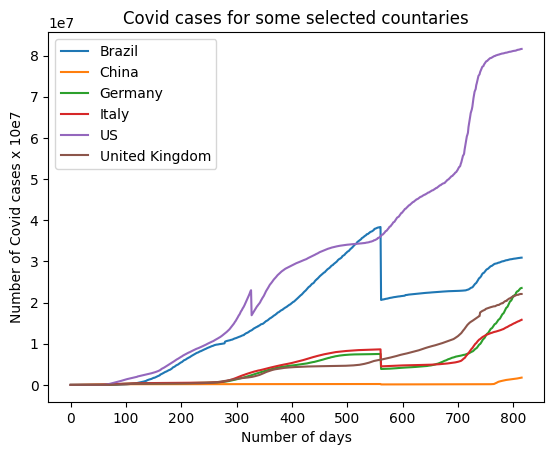

In [4]:
# get columns to plot
columns = pivot_df.columns
# create x data
x_data = range(0, pivot_df.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, pivot_df[column], label=column)
# set title and legend
ax.set_title('Covid cases for some selected countaries')
ax.set_xlabel('Number of days')
ax.set_ylabel('Number of Covid cases x 10e7')
ax.legend()

# My interactive line plot

In [5]:
# Plots all of the lines in the covid dataframe
fig = px.line(pivot_df, # The df to use
              y=pivot_df.columns, # Taking the names of the columns and making a new line with each of them
              title="Number of Covid Cases per Country", # Got the name from the chart above
              labels={"value": "Number of Cases", "variable": "Country"}) # Changing the name of the labels to make more sense

fig.show()

# Original Histogram

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

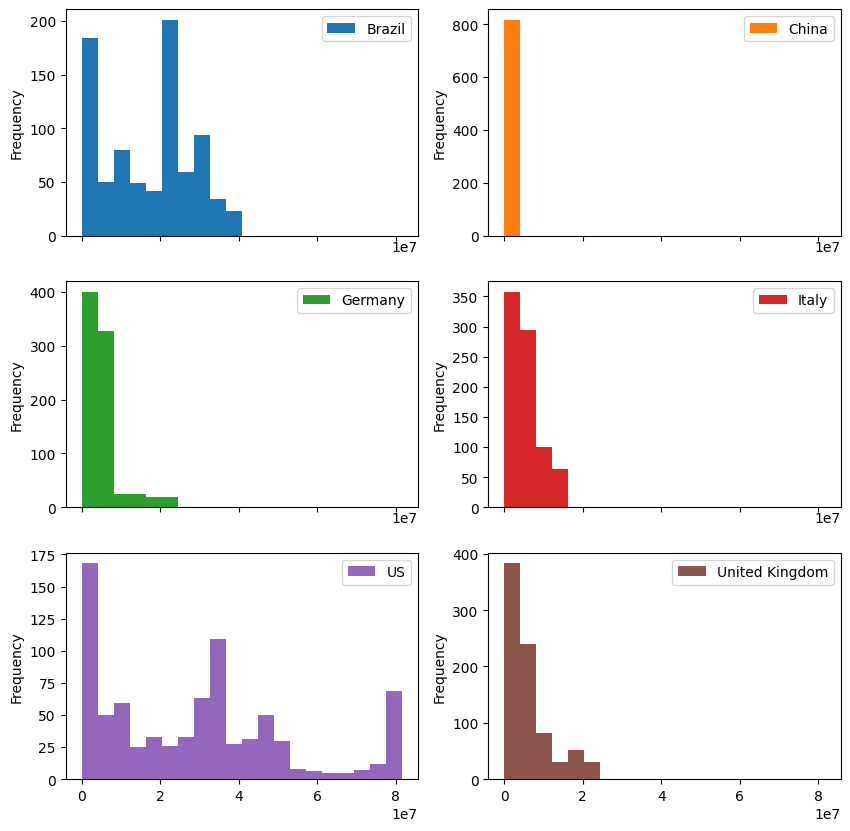

In [6]:
pivot_df.plot.hist(subplots=True, layout=(3,2), figsize=(10, 10), bins=20)

# My interactive histogram

In [7]:
# Creating all of the subplots for the histograms
fig = make_subplots(rows=3, cols=2, subplot_titles=pivot_df.columns)

# Create a new histogram for every country
for i in range(len(pivot_df.columns)):
    row, col = divmod(i, 2)  # Calculates the row and col
    country = pivot_df.columns[i] # Gets the current country
    country_data = df[df['Country'] == country]['Cases'] # Gets the cases in the curr country

    fig.add_trace(
        go.Histogram( # Editing the histogram
            x = country_data, # Setting the X axis data
            nbinsx = 20, # Setting num of bins
            name = country, # Name in the legend
            # Nice formatting for hover behavior gotten from https://plotly.com/python/hover-text-and-formatting/#modifying-the-hovertemplate-of-a-plotly-express-figure
            hovertemplate = 'Cases: %{x}<br>Occurrences: %{y}<extra></extra>'
        ),
        row = row + 1, col = col + 1
    )
    # Setting the axes with the correct labels
    fig.update_xaxes(title_text=f"{country} Cases", row = row + 1, col = col + 1)
    fig.update_yaxes(title_text = "Occurrences", row = row + 1, col = col + 1)

# Formats the figures to fit nicely, and give the entire plot a title
fig.update_layout(
    height = 1000,
    width = 1000,
    title_text = "Covid Cases by Country"
)

fig.show()